## Lets do Exploratory Data Analysis (EDA)

#### Import necessary Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read csv file that was saved from step 1 (Data wrangling)

In [2]:
df = pd.read_csv("LendingClub_cleaned.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852324 entries, 0 to 1852323
Data columns (total 88 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   funded_amnt                 float64
 2   funded_amnt_inv             float64
 3   term                        object 
 4   int_rate                    float64
 5   installment                 float64
 6   grade                       object 
 7   sub_grade                   object 
 8   emp_length                  object 
 9   home_ownership              object 
 10  annual_inc                  float64
 11  verification_status         object 
 12  issue_d                     object 
 13  loan_status                 object 
 14  pymnt_plan                  object 
 15  purpose                     object 
 16  title                       object 
 17  addr_state                  object 
 18  dti                         float64
 19  delinq_2yrs          

### Find the % of people who paid off in time

In [4]:
pie1 = df['loan_status'].value_counts(dropna=False)

In [5]:
pie1.index

Index(['Fully Paid', 'Current', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default'],
      dtype='object')

<Figure size 3600x3600 with 0 Axes>

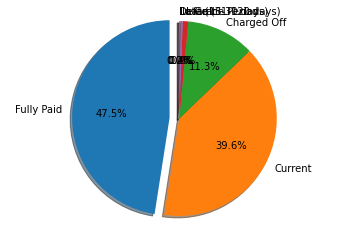

In [6]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = pie1.index
sizes = pie1.values
explode = (0.1, 0, 0, 0, 0, 0,0)  # only "explode" the first slice (i.e. 'Fully paid')
plt.figure(figsize = (50,50))
fig1, ax1 = plt.subplots(1,1)

ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 1. Why people are applying for a loan?

In [7]:
cat_feat = df.select_dtypes('object').columns.values
df[cat_feat].nunique().sort_values(ascending = False)

title                   35171
earliest_cr_line          733
last_credit_pull_d         81
last_pymnt_d               79
issue_d                    77
addr_state                 51
sub_grade                  35
purpose                    14
emp_length                 11
loan_status                 7
grade                       7
home_ownership              6
verification_status         3
application_type            2
disbursement_method         2
hardship_flag               2
term                        2
initial_list_status         2
pymnt_plan                  2
debt_settlement_flag        2
dtype: int64

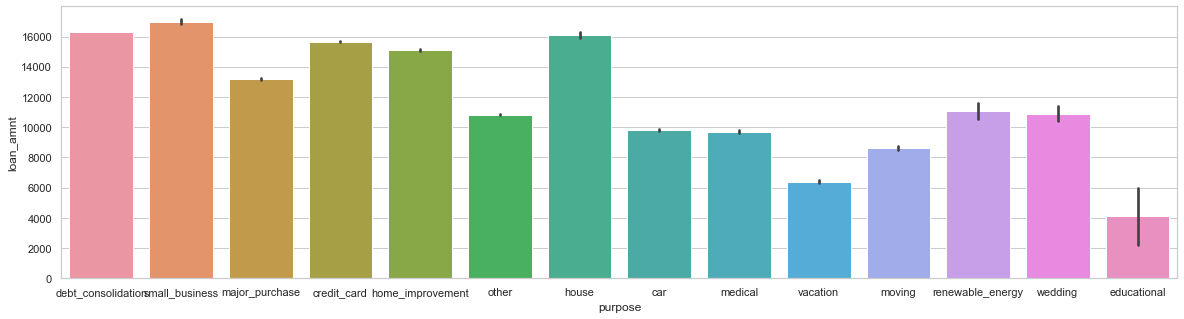

In [8]:
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
b = sns.barplot(x="purpose", y="loan_amnt", data=df)
#b.axes.set_title("Title",fontsize=20)

### 2. What is the current loan status? 

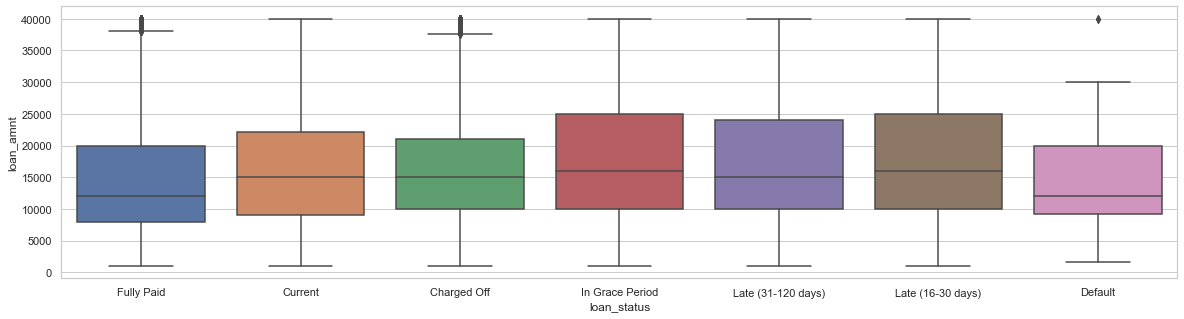

In [9]:
#plt.figure(figsize=(25,10))
#sns.set_theme(style="whitegrid")
#b = sns.barplot(x="loan_status", y="loan_amnt", data=df)
#b.axes.set_title("Title",fontsize=20)

_= plt.figure(figsize = (20,5))
_= sns.boxplot(y="loan_amnt", x="loan_status", data=df)

### 3. What is the relationship between loan ammount and employment length?

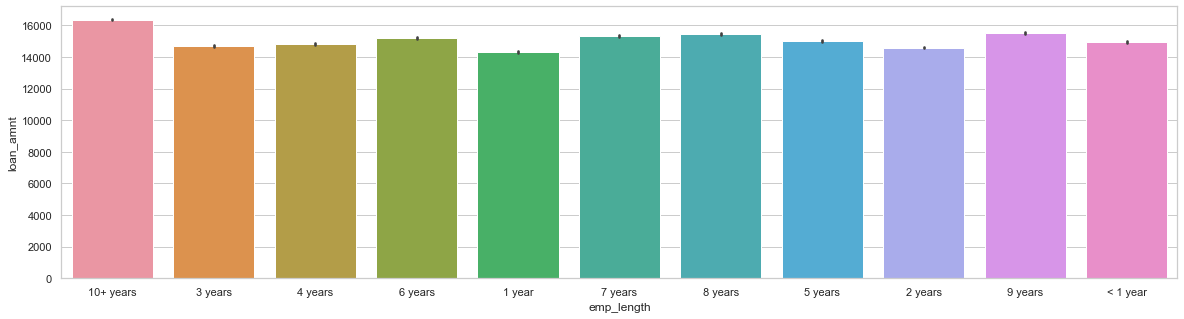

In [10]:
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
b = sns.barplot(x="emp_length", y="loan_amnt", data=df)
#b.axes.set_title("Title",fontsize=20)

### 4. What is the home ownership status of borrowers ?

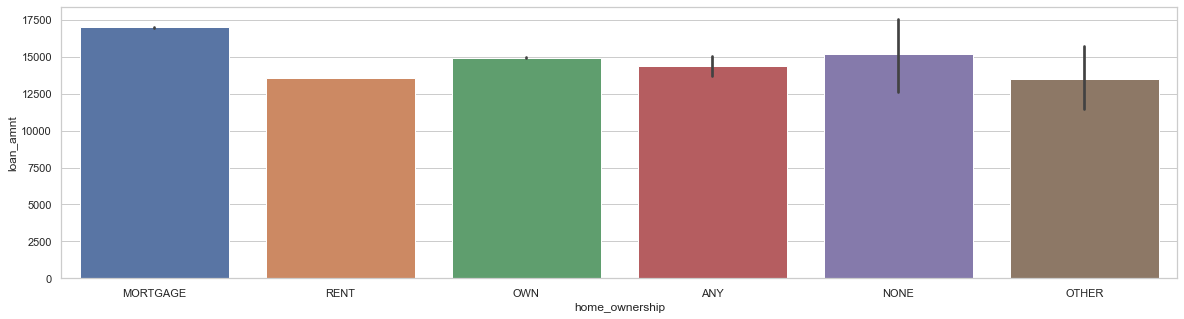

In [11]:
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
b = sns.barplot(x="home_ownership", y="loan_amnt", data=df)
#b.axes.set_title("Title",fontsize=20)

### 5. Any relationship between loan status with interest rate?

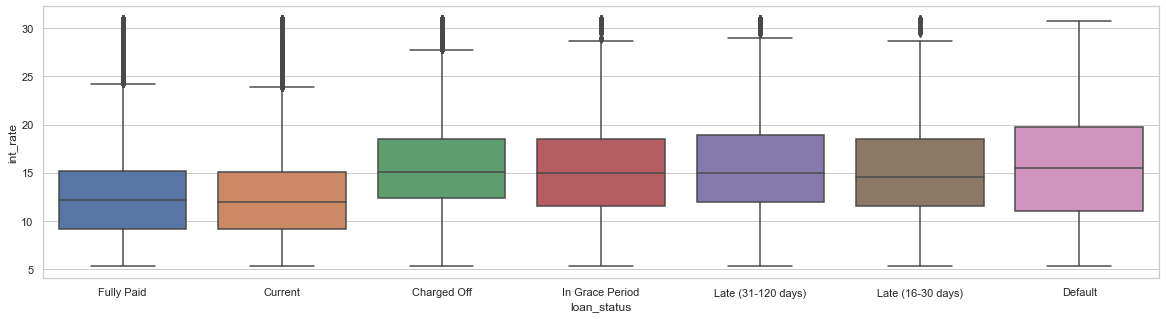

In [12]:
_= plt.figure(figsize = (20,5))
_ =sns.boxplot(y="int_rate", x="loan_status", data=df)

### 6. We are intrested only in "Fully paid" and "Default", so consider only those in loan status

In [13]:
#df1 = df[(df.loan_status == "Fully Paid") | (df.loan_status == "Charged Off")]

In [90]:
df1 = df[(df.loan_status == "Fully Paid") | (df.loan_status == "Default")]

### 7. What is the verification status of borrower ?

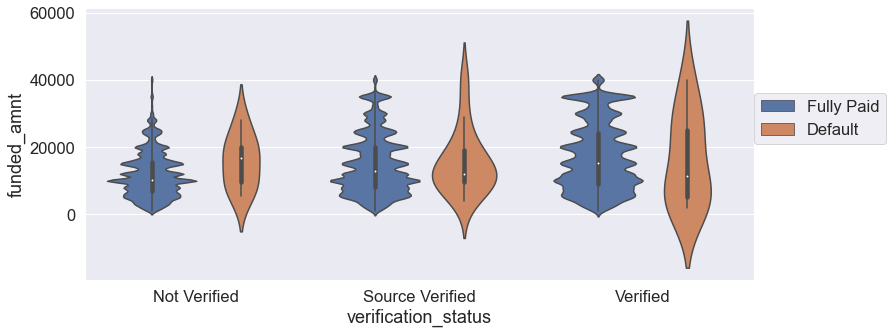

In [91]:
_= plt.figure(figsize = (12,5))
_= sns.set(font_scale=1.5)
ax = sns.violinplot(data=df1, x='verification_status',
                    y='funded_amnt', hue='loan_status')

_= ax.legend(loc=(1, 0.5))

### 8. Now lets see what is the loan status over the time?

In [15]:
from pandas.tseries.offsets import DateOffset
# Convert colums with data into python datetime object
df1.earliest_cr_line = pd.to_datetime(df1.earliest_cr_line)
df1.issue_d = pd.to_datetime(df1.issue_d)
df1.last_pymnt_d = pd.to_datetime(df1.last_pymnt_d)
df1.last_credit_pull_d = pd.to_datetime(df1.last_credit_pull_d)

C:\Users\abishek\Anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
term = df1.term.str.replace('months','').astype(int)

In [17]:
term_days = pd.to_timedelta(term*30, unit='D')

In [18]:
df1["final_d"] = df1.issue_d + pd.to_timedelta(term_days, unit='D')

C:\Users\abishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df1.final_d.max()

Timestamp('2023-11-05 00:00:00')

In [22]:
df1 = df1[df1.final_d < df1.issue_d.max()]

In [23]:
df1.final_d.max()

Timestamp('2018-11-15 00:00:00')

In [27]:
df_sample = df1[['issue_d', 'term', 'funded_amnt', 'recoveries', 'loan_status','final_d']]

In [40]:
df_sample.index = df_sample.final_d
df_sam = df_sample.resample('M')

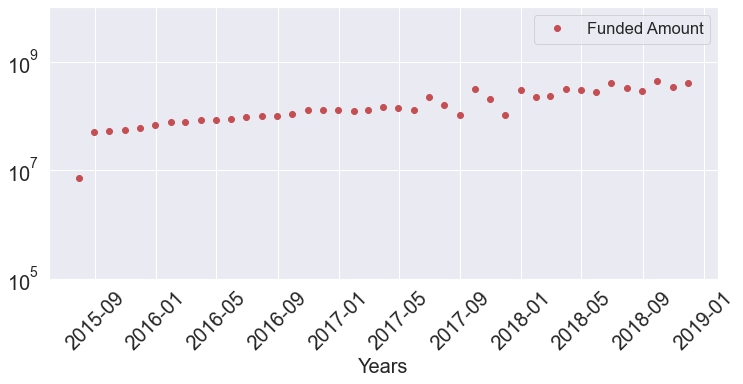

In [57]:
_= fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False, figsize=[12, 5])
_= plt.plot(df_sam.funded_amnt.sum(), 'ro', label='Funded Amount')
_= axes[0, 0].tick_params(axis='x', rotation=45, labelsize=20)
_= axes[0, 0].tick_params(axis='y', rotation=0, labelsize=20)
_= plt.xlabel('Years', fontsize=20)
_= plt.semilogy()
_= plt.ylim(1e5, 1e10)
_= plt.legend()

### Lets check fraction of charged off and recovered amount over the time


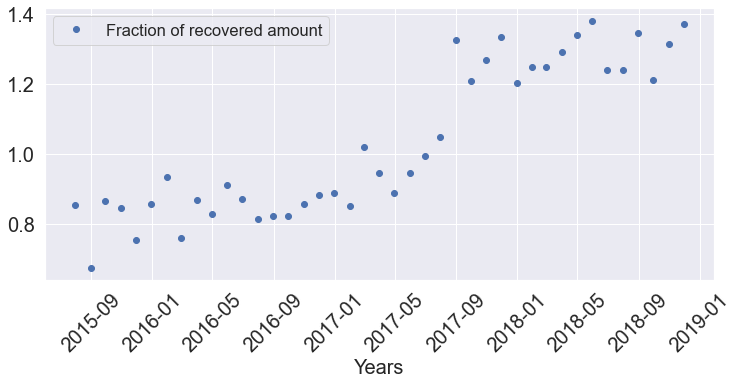

In [75]:
_= fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False, figsize=[12, 5])
fract = 100*df_sam.sum().recoveries/df_sam.sum().funded_amnt
_= plt.plot(fract,marker = 'o', label='Fraction of recovered amount',linewidth=0.0)
_= axes[0, 0].tick_params(axis='x', rotation=45, labelsize=20)
_= axes[0, 0].tick_params(axis='y', rotation=0, labelsize=20)
_= plt.xlabel('Years', fontsize=20)
_= plt.legend()


In [85]:
"""
df_sam1 = (df_sample[df_sample.loan_status == 'Current/Fully Paid']).\
           resample('M').count()
df_sam2 = (df_sample[df_sample.loan_status != 'Current/Fully Paid']).\
           resample('M').count()

fract1 = 100*(df_sam2.term/df_sam1.term)
plt.plot(fract1, marker='o', label='Fraction of Charged off borrowers')
"""

"\ndf_sam1 = (df_sample[df_sample.loan_status == 'Current/Fully Paid']).           resample('M').count()\ndf_sam2 = (df_sample[df_sample.loan_status != 'Current/Fully Paid']).           resample('M').count()\n\nfract1 = 100*(df_sam2.term/df_sam1.term)\nplt.plot(fract1, marker='o', label='Fraction of Charged off borrowers')\n"

In [97]:
target_list = [1 if i=='Default' else 0 for i in df1['loan_status']]
df1['TARGET'] = target_list
df1['TARGET'].value_counts()

C:\Users\abishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    880570
1        30
Name: TARGET, dtype: int64

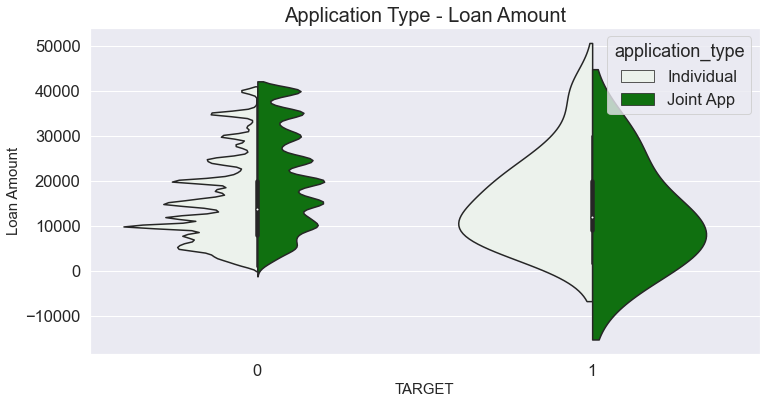

In [93]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df1, hue="application_type", split=True,color='green')
plt.title("Application Type - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);